In [1]:
#!pip install pymysql
#!pip install mysql-connector

### **CLIENT: ABC Tech** 
### **CATEGORY: ITSM - ML**
### **PROJECT REFERENCE: PM-PR-0012**

#### **BUSINESS CASE:** 

ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment. ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

**Machine Learning as way to improve ITSM processes**

ABC Tech management recently attended Machine Learning conference on ML for ITSM.
Machine learning looks prospective to improve ITSM processes through prediction and automation. They came up with 4 key areas, where ML can help ITSM process in ABC Tech.
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before
it surfaces.
2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

### **IMPORTING THE REQUIRED LIBARIES FOR DATA IMPORTING AND CLEANING**

In [2]:
#importing the required packages and classes
import os
import pymysql
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

### **IMPORTING DATA FROM SQL SERVER**

In [3]:
#making a connection to database
conn = mysql.connector.connect(host='18.136.157.135', 
                               user='dm_team', 
                               password='DM!$Team@&27920!', 
                               database='project_itsm')

In [4]:
#checking the available databases with the pymysql
dbs = pd.read_sql_query("show databases", conn)
print(dbs)

             Database
0  information_schema
1        project_itsm


In [5]:
#checking the number of databases in server with the mysqlconnector
cursor = conn.cursor()
cursor.execute('show databases')
for i in cursor:
    print("Available Databases: ", i)

Available Databases:  ('information_schema',)
Available Databases:  ('project_itsm',)


In [6]:
#checking the tables in the database with mysqlconnector
cursor = conn.cursor()
cursor.execute("show tables")
for i in cursor:
    print("Available table in the database" ,i)

Available table in the database ('dataset_list',)


In [7]:
#selecting table from the database
df=pd.read_sql_query('select * from dataset_list', conn)

In [8]:
#printing the SQL dataset
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [9]:
#converting the Sql dataset to CSV file
df.to_csv("itsm.csv")

In [10]:
#reading the CSV file
data=pd.read_csv("itsm.csv")
data

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


### **BASIC EDA CHECKS**

In [11]:
#performing basic EDA checks
data.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [12]:
#checking the last 4 columns
data.tail()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN
46605,46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3.0,...,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,SD0147088,NaN,NaN,NaN


In [13]:
#Checking random data from the dataset
data.sample(5)

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
13474,13474,ESC000082,computer,ESX Cluster,WBS000102,IM0013669,Closed,NS,3,NaN,...,NaN,15-11-2013 14:19,15-11-2013 14:19,"4,05,69,44,444",Unknown,1.0,SD0039452,NaN,NaN,NaN
32848,32848,WBA000018,application,Web Based Application,WBS000073,IM0033144,Closed,4,4,4.0,...,NaN,06-02-2014 13:32,06-02-2014 13:32,"3,99,56,11,111",Unknown,1.0,SD0100670,NaN,NaN,NaN
40443,40443,SUB000455,subapplication,Web Based Application,WBS000073,IM0040782,Closed,4,4,4.0,...,NaN,03-03-2014 11:31,03-03-2014 11:31,"0,239166667",Other,1.0,SD0124669,NaN,NaN,NaN
1216,1216,WBA000144,application,Web Based Application,WBS000318,IM0001316,Closed,4,4,4.0,...,NaN,03-10-2013 18:00,03-10-2013 18:00,"29,415",Software,1.0,SD0001842,NaN,NaN,NaN
30744,30744,XSR000094,computer,X86 Server,WBS000120,IM0031029,Closed,3,3,3.0,...,27-01-2014 17:09,28-01-2014 11:20,28-01-2014 11:20,"7,48,66,66,667",Hardware,2.0,#MULTIVALUE,NaN,NaN,NaN


In [14]:
#checking the basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  46606 non-null  int64  
 1   CI_Name                     46606 non-null  object 
 2   CI_Cat                      46495 non-null  object 
 3   CI_Subcat                   46495 non-null  object 
 4   WBS                         46606 non-null  object 
 5   Incident_ID                 46606 non-null  object 
 6   Status                      46606 non-null  object 
 7   Impact                      46606 non-null  object 
 8   Urgency                     46606 non-null  object 
 9   Priority                    45226 non-null  float64
 10  number_cnt                  46606 non-null  float64
 11  Category                    46606 non-null  object 
 12  KB_number                   46606 non-null  object 
 13  Alert_Status                466

In [15]:
#checking the shape of the data
data.shape

(46606, 26)

In [16]:
#checking the descriptive statistics of the data
data.describe()

,Unnamed: 0,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,46606.00000,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,23302.50000,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,13454.13766,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,0.00000,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,11651.25000,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,23302.50000,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,34953.75000,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,46605.00000,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [17]:
#checking the descriptive statistics of object datatype
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [18]:
#checking the column names of the dataset
data.columns

Index(['Unnamed: 0', 'CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID',
       'Status', 'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category',
       'KB_number', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

### **EXPLORATORY DATA ANALYSIS**

In [19]:
#Checking the value_counts of all the columns

cols=data.keys()
for i in cols:
    pd.set_option("display.max_columns", None)
    print("Value counts of",i)
    print(data[i].value_counts())
    print("\n")

Value counts of Unnamed: 0
Unnamed: 0
0        1
31063    1
31065    1
31066    1
31067    1
        ..
15537    1
15538    1
15539    1
15540    1
46605    1
Name: count, Length: 46606, dtype: int64


Value counts of CI_Name
CI_Name
SUB000456    3050
SBA000263    2176
SBA000607    1743
SBA000462    1698
WBA000058    1614
             ... 
LAP001572       1
LAP000809       1
LAP000513       1
CBD000266       1
SWT000008       1
Name: count, Length: 3019, dtype: int64


Value counts of CI_Cat
CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64


Value counts of CI_Subcat
CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desk

In [20]:
#checking for missing values in the dataset

data.isnull().sum()

Unnamed: 0                        0
CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [21]:
#checking for the duplicate values

duplicates = data[data.duplicated()]
print(f"Duplicate values in the dataset are",duplicates.shape[0])

Duplicate values in the dataset are 0


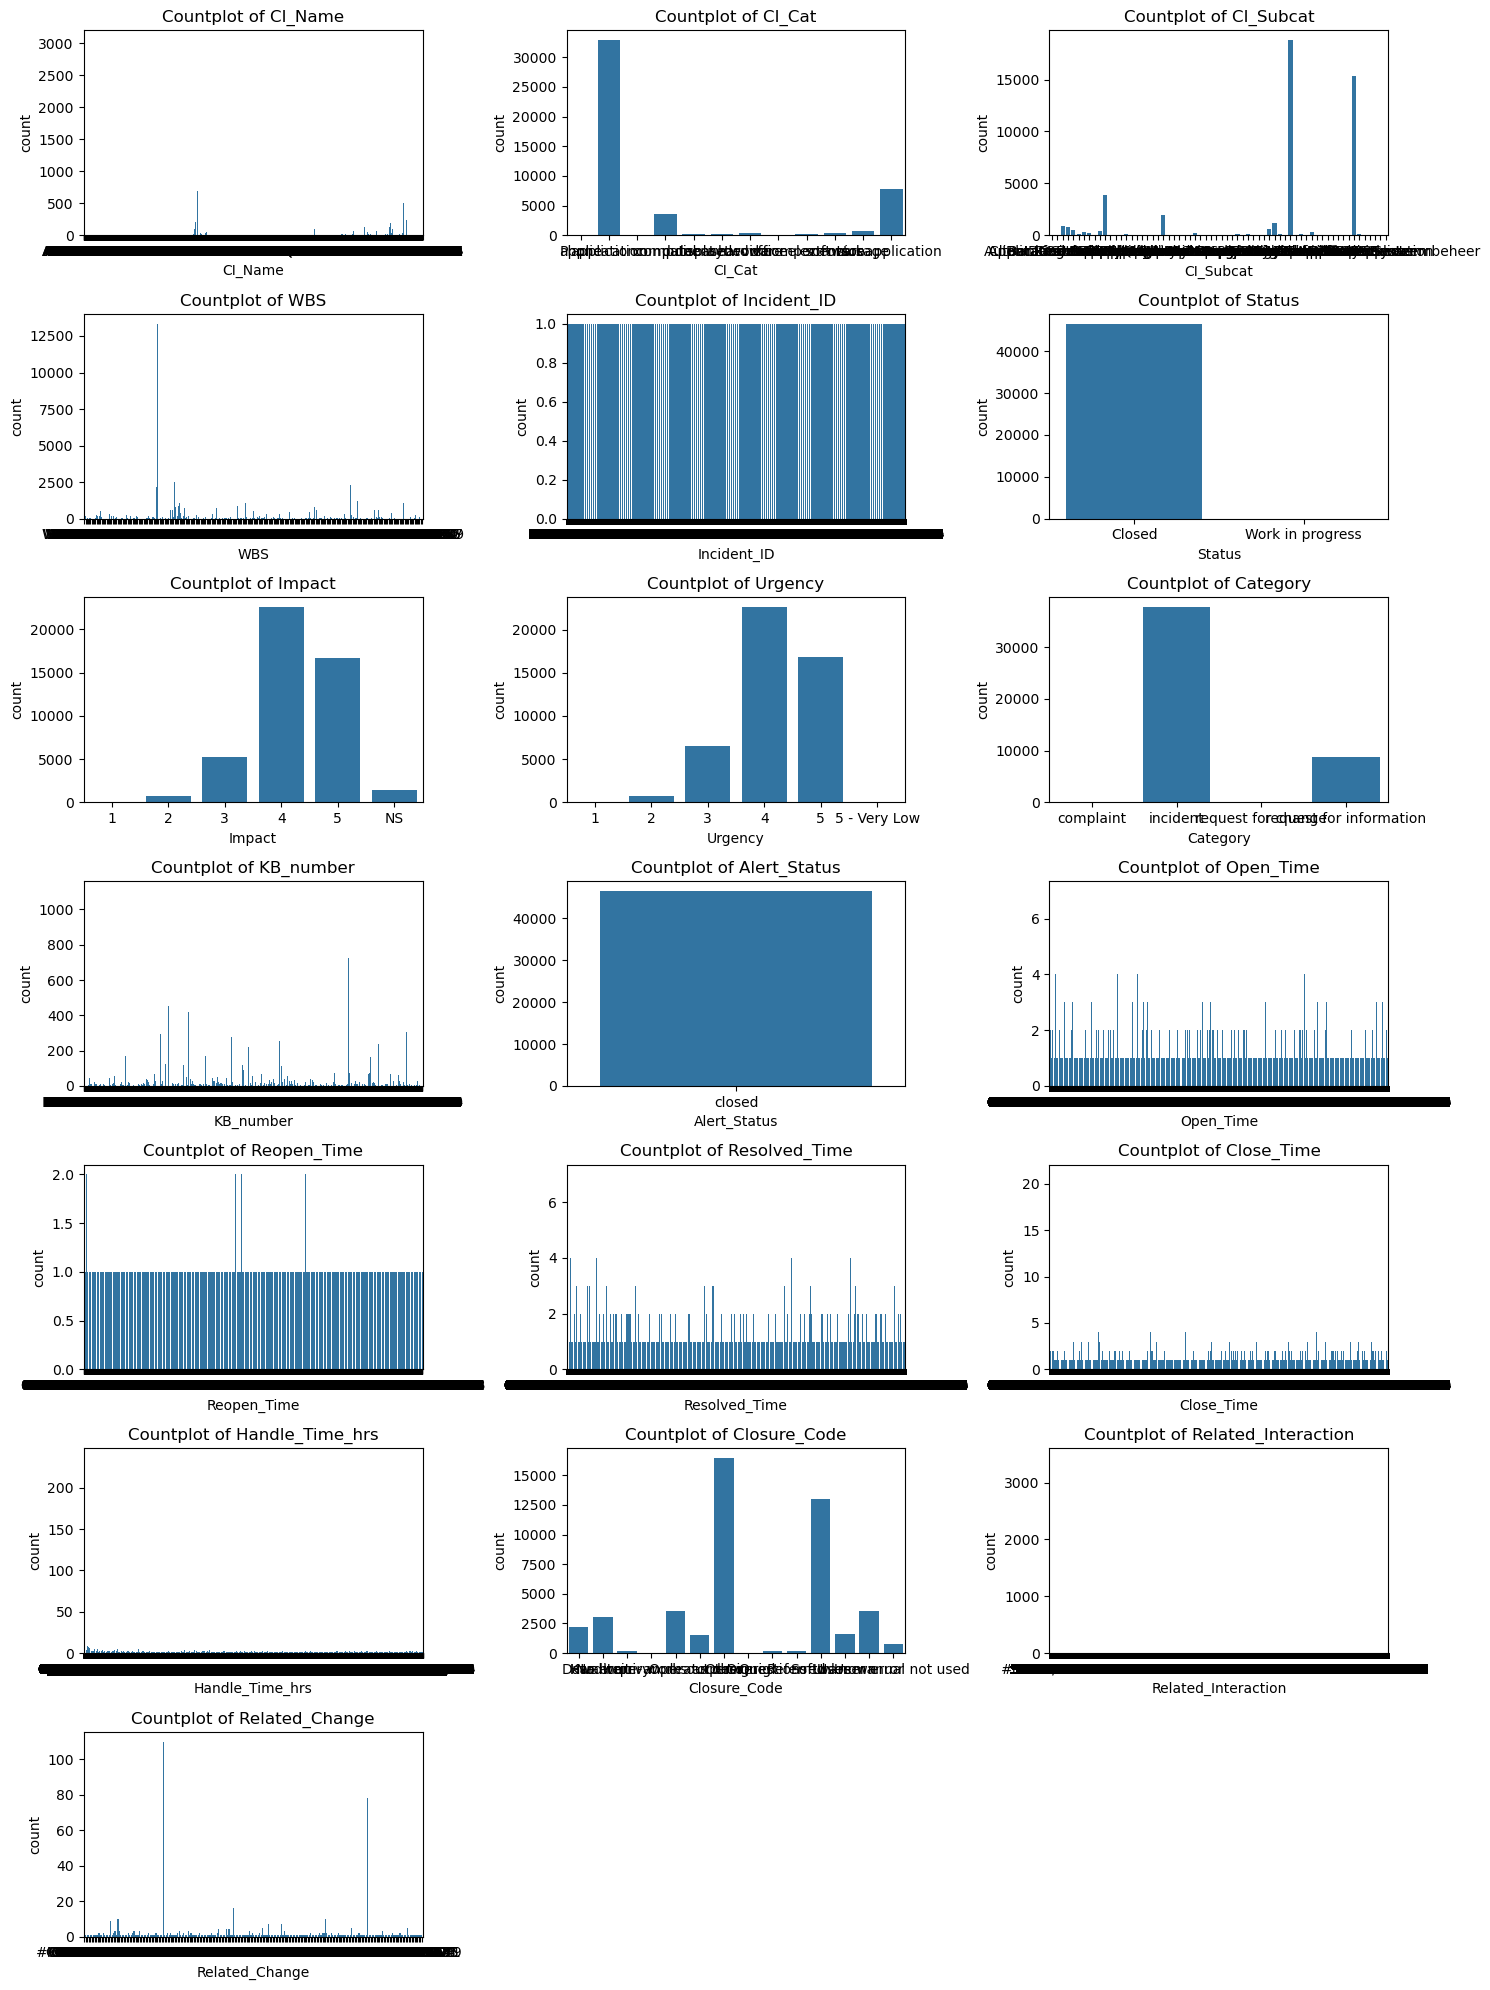

In [22]:
#Analysing the categorical columns
cat_cols = data.select_dtypes(include="O").columns  #selecting the categorical columns
#visualizing the categorical columns with the countplot for analysing 
n=len(cat_cols)
rows = math.ceil(n/3)

plt.figure(figsize=(15,20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=data, order=data[col].value_counts().index.astype(str).sort_values(ascending=True))
    plt.title(f"Countplot of {col}")
plt.tight_layout()
plt.show()

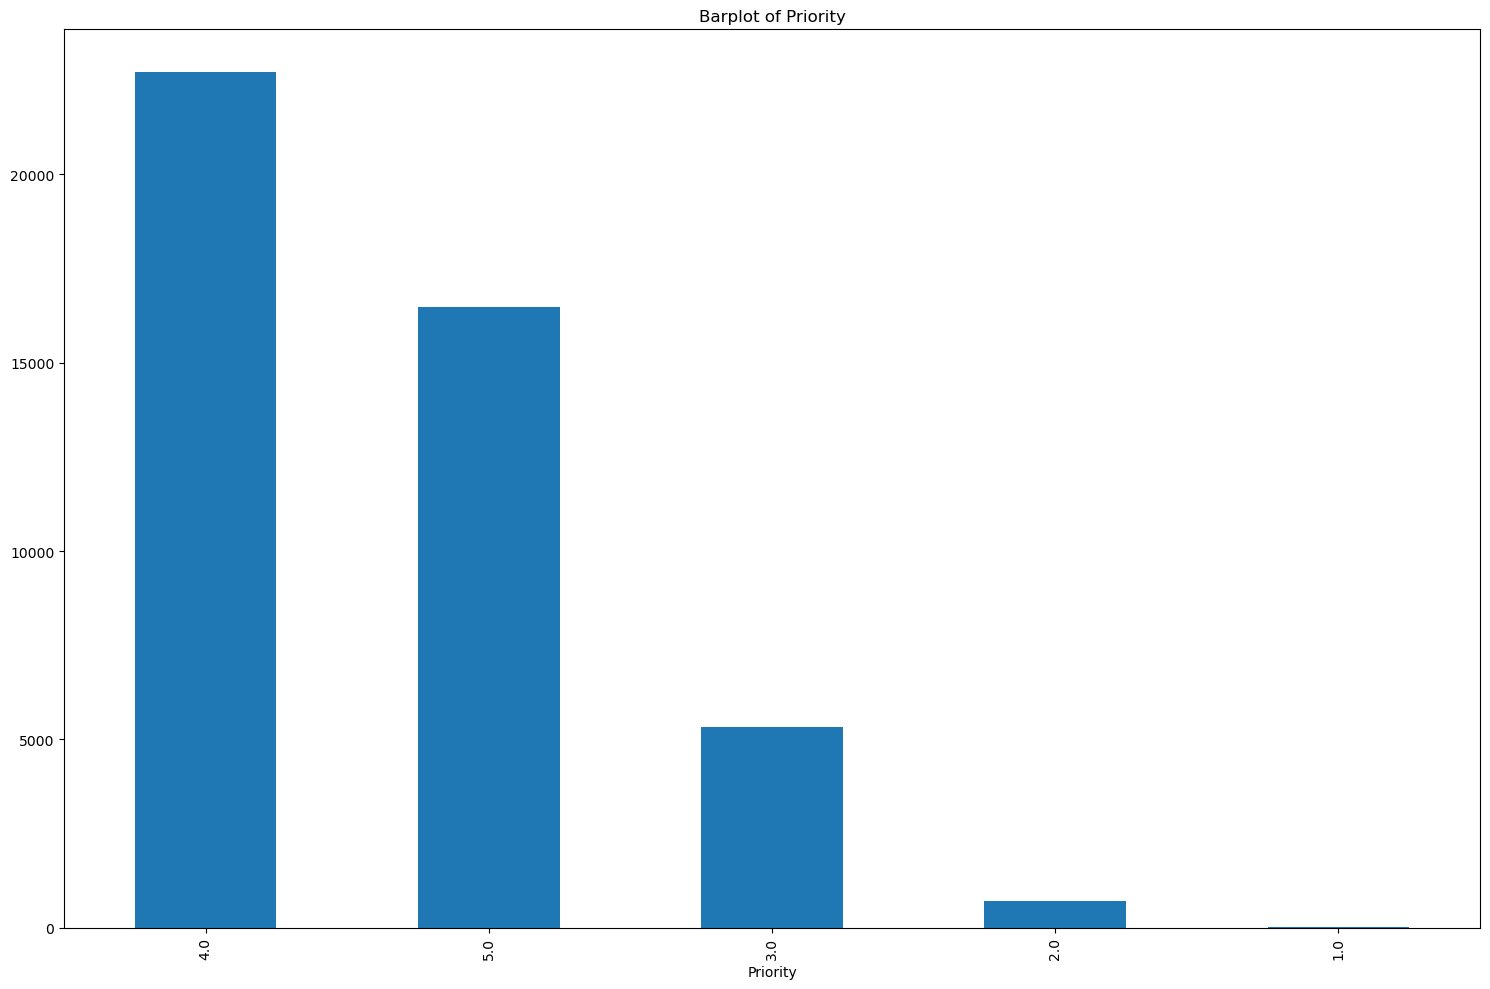

In [23]:
#Visualizing the priority with the barplot

plt.figure(figsize=(15,10))
data["Priority"].value_counts().plot(kind="bar")
plt.title("Barplot of Priority")
plt.tight_layout()
plt.show()

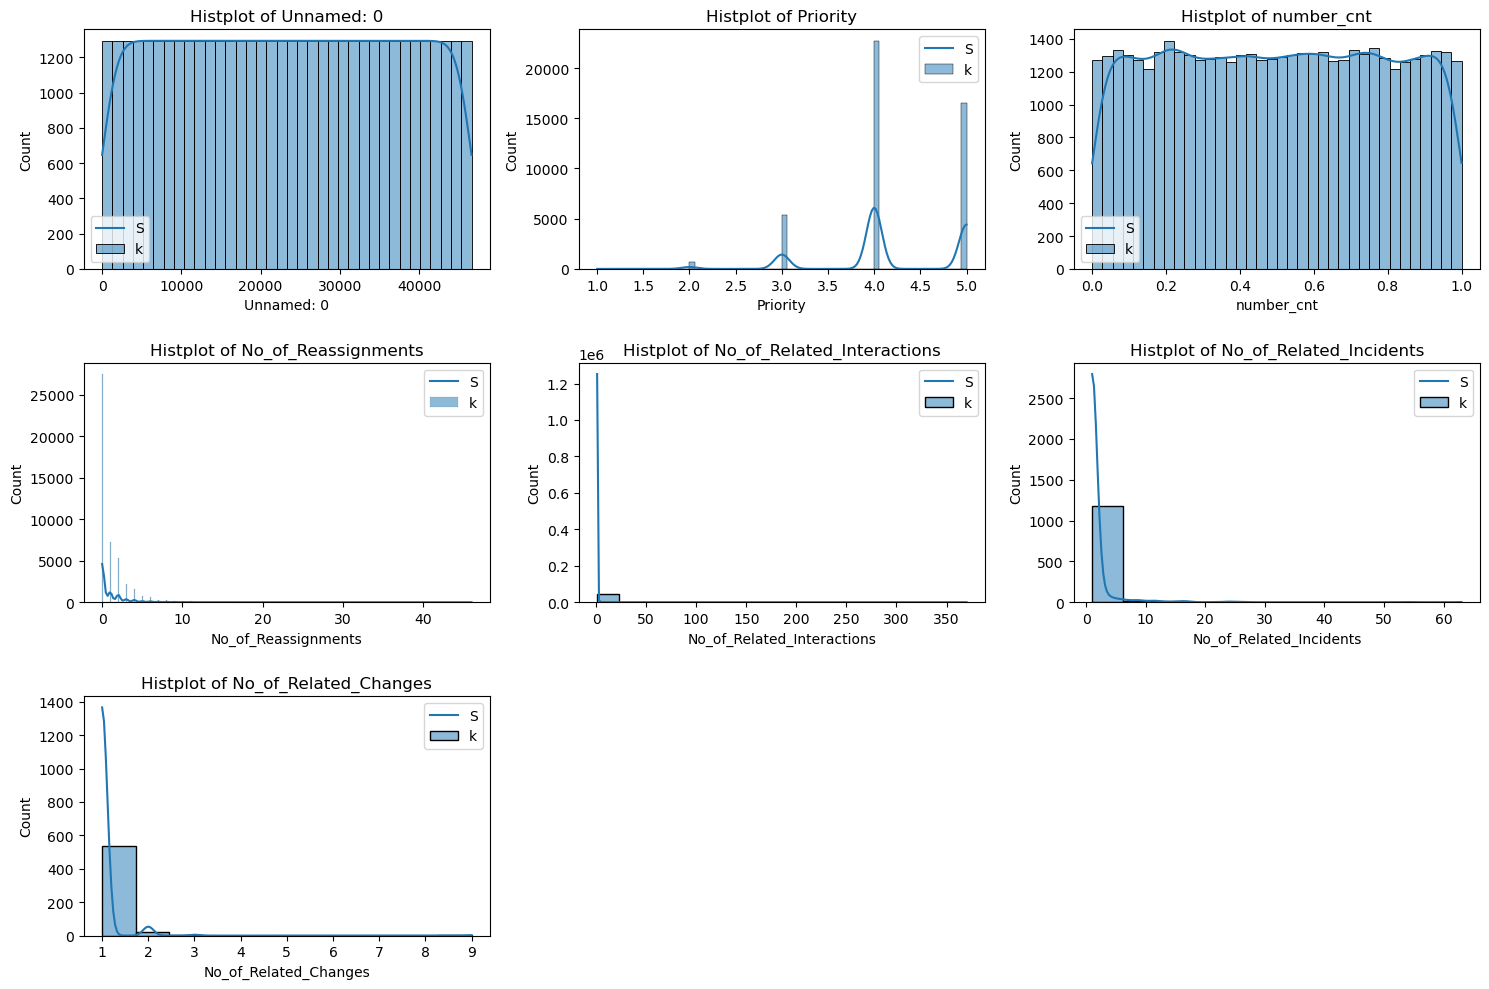

In [24]:
#Analysing the numerical columns

num_cols = data.select_dtypes(include="number").columns #selecting the numerical columns

#Visualizing the numerical columns with the histplot for analysing
n=len(num_cols)
rows=math.ceil(n/3)

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data=data[col], kde=True)
    plt.title(f"Histplot of {col}")
    plt.legend(f"Skewness:{data[col].skew():.2f}")
plt.tight_layout()
plt.show()

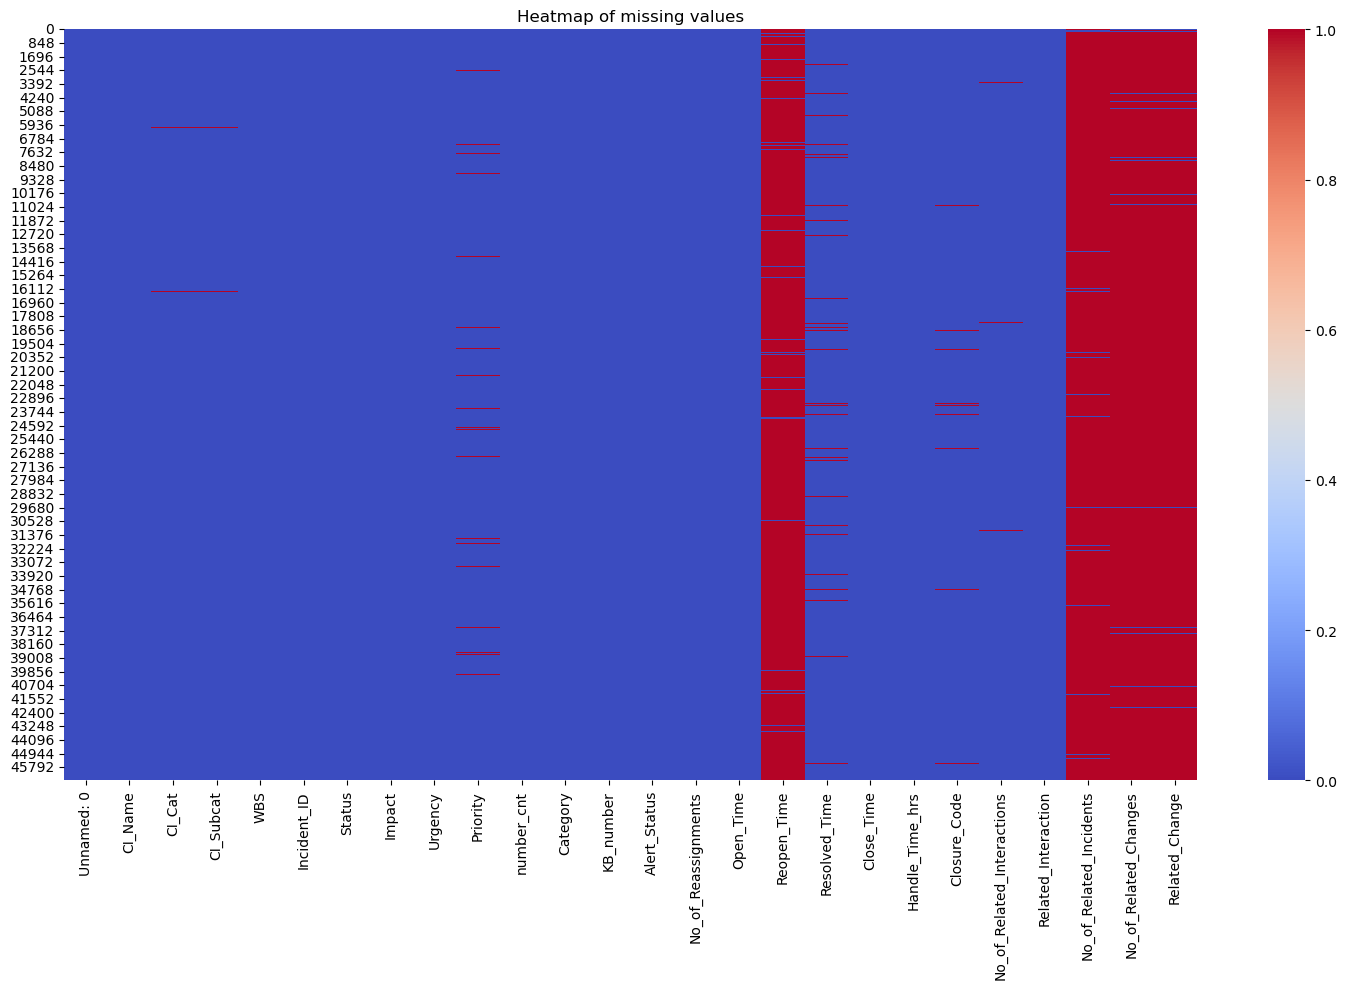

In [25]:
#visualization of missing values in the dataset

missing_vals = data.isnull()
plt.figure(figsize=(15,10))
sns.heatmap(data=missing_vals, annot=False, cmap='coolwarm')
plt.title("Heatmap of missing values")
plt.tight_layout()
plt.show()

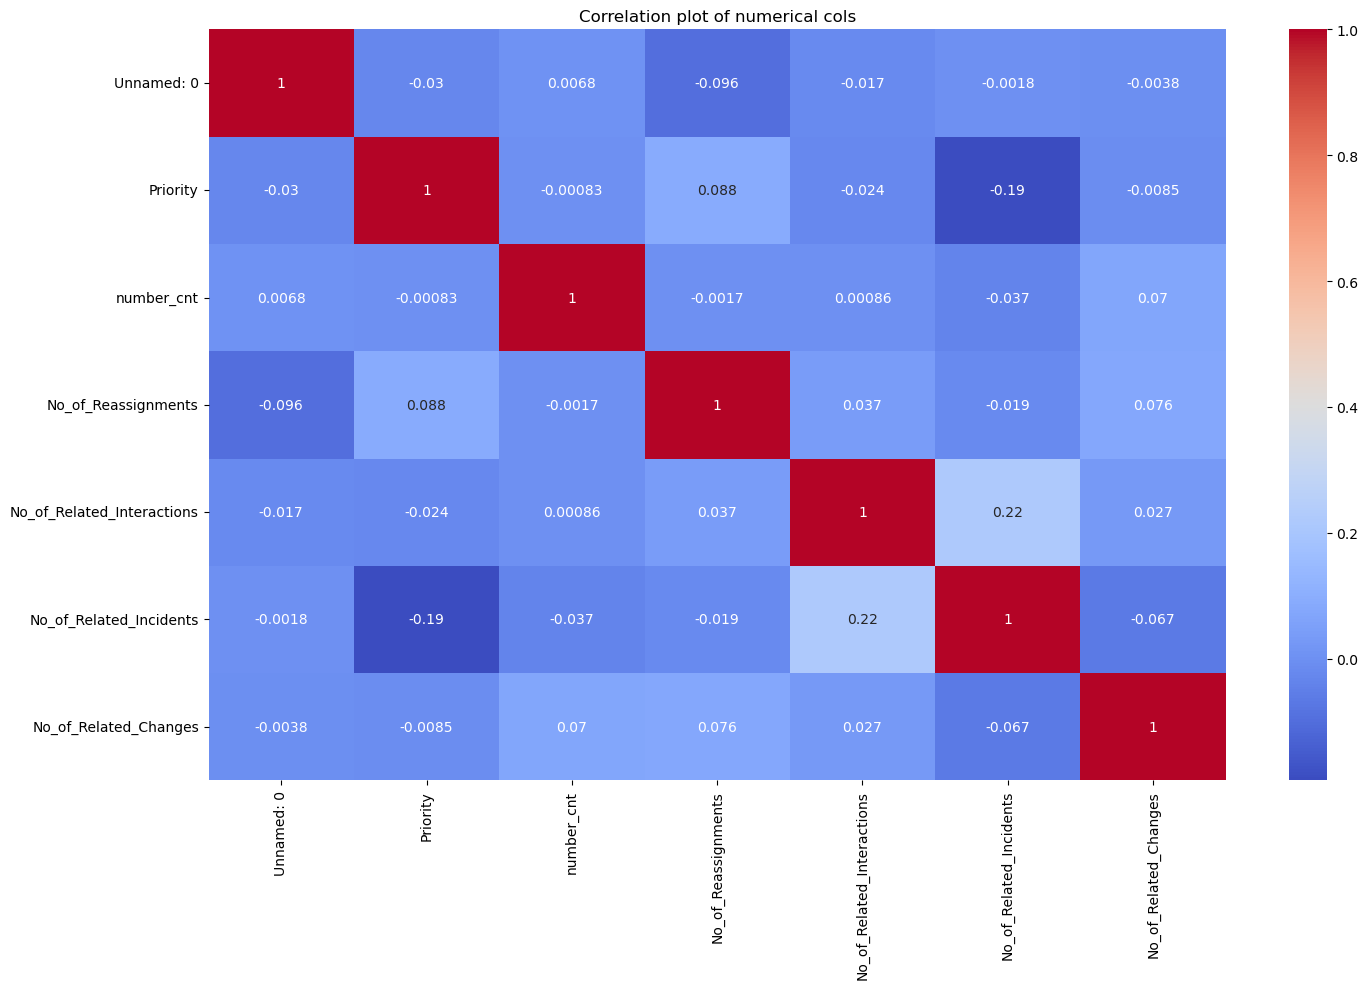

In [26]:
#Correlation of the data

plt.figure(figsize=(15,10))
sns.heatmap(data=data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2g", cbar=True)
plt.title("Correlation plot of numerical cols")
plt.tight_layout()
plt.show()

In [27]:
# Time based analysis

data["Open_Time"]=pd.to_datetime(data["Open_Time"], errors='coerce')
data["Open_monthwise"]=data["Open_Time"].dt.to_period("M")
monthly_count = data["Open_monthwise"].value_counts().sort_index()

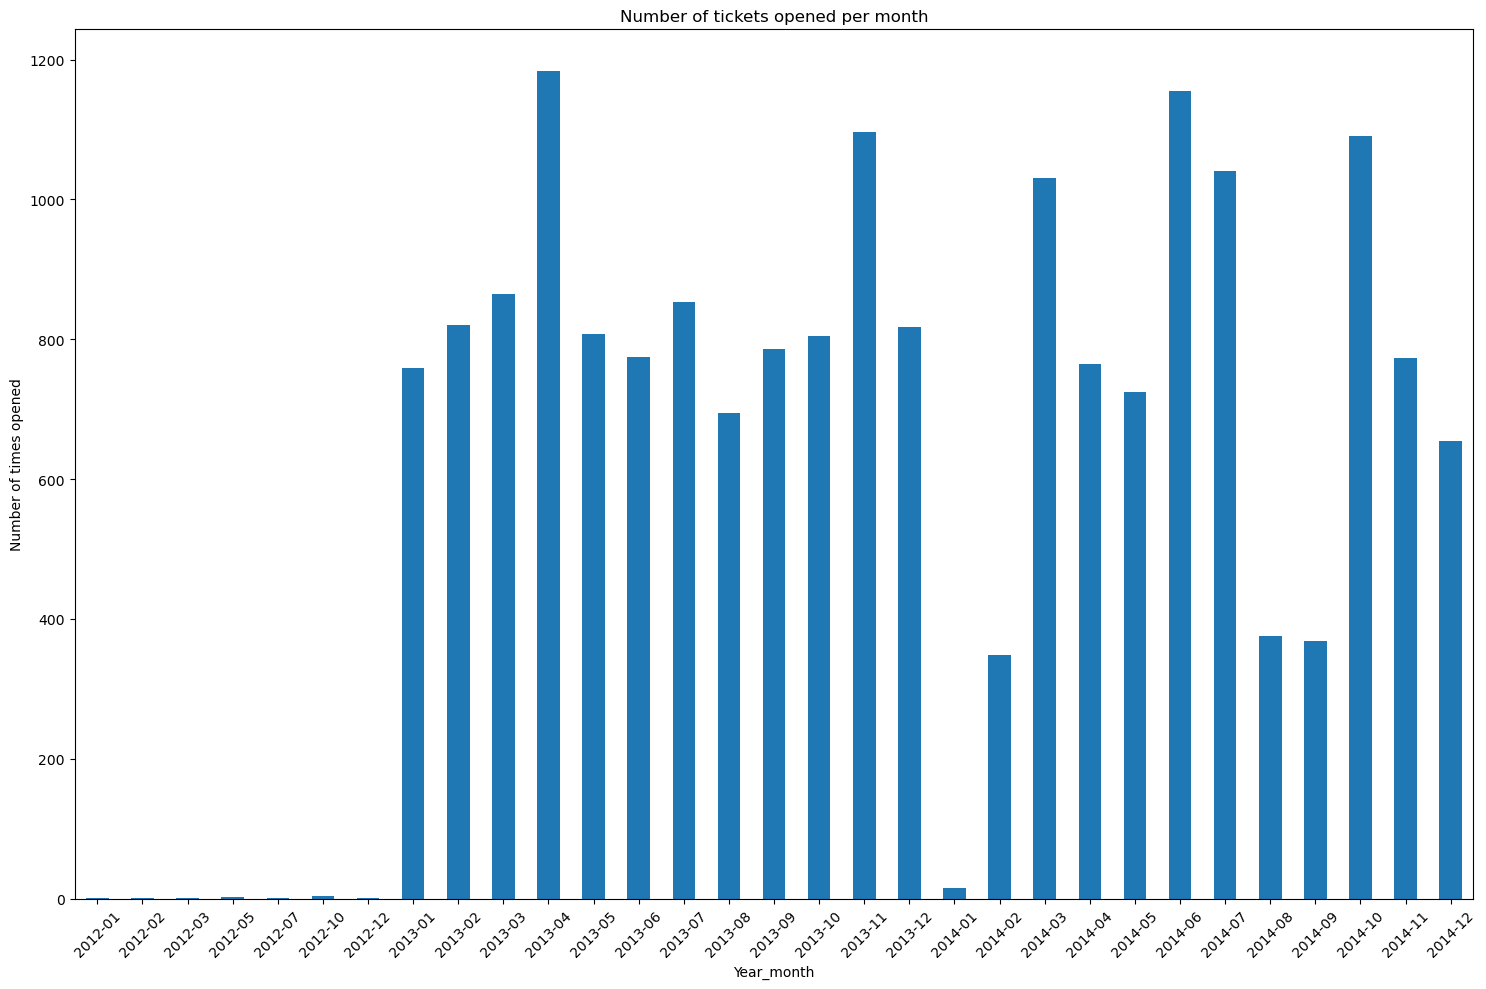

In [28]:
#Visualization of monthly count 

monthly_count.plot(kind='bar', figsize=(15,10))
plt.title("Number of tickets opened per month")
plt.xlabel("Year_month")
plt.ylabel("Number of times opened")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **TIME BASED ANALYSIS**

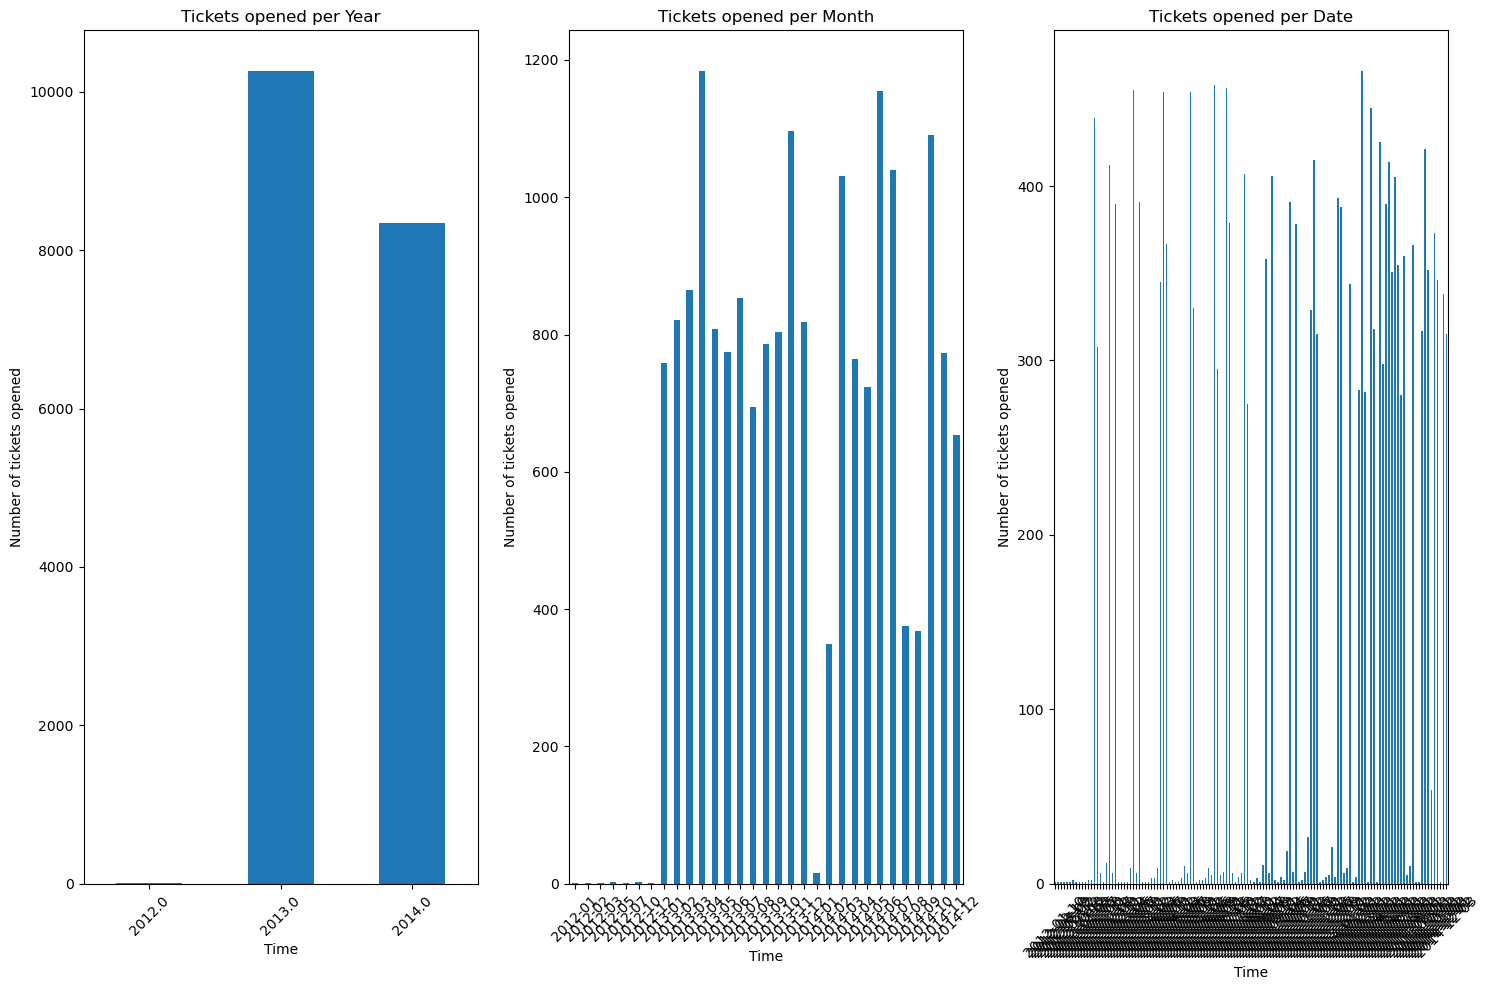

In [29]:
#Analysis of Open time column

data["Open_Time"]=pd.to_datetime(data["Open_Time"], errors='coerce')
#Yearwise count
data["Open_yearwise"]=data["Open_Time"].dt.year
open_year = data["Open_yearwise"].value_counts().sort_index()
#monthwise count
data["Open_monthwise"]= data["Open_Time"].dt.to_period("M")
open_month = data["Open_monthwise"].value_counts().sort_index()
#datewise count
data["Open_datewise"]=data["Open_Time"].dt.date
open_date = data["Open_datewise"].value_counts().sort_index()

opentime_analysis=[open_year, open_month, open_date] #creating a list with the seperated values

#Assigning name to the series

open_year.name = "Year" 
open_month.name = "Month"
open_date.name = "Date"

#plotting the values

plt.figure(figsize=(15,10))
for i, feature in enumerate(opentime_analysis, 1):
    plt.subplot(1, 3, i)
    feature.plot(kind='bar')
    plt.title(f"Tickets opened per {feature.name}")
    plt.xlabel("Time")
    plt.ylabel("Number of tickets opened")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

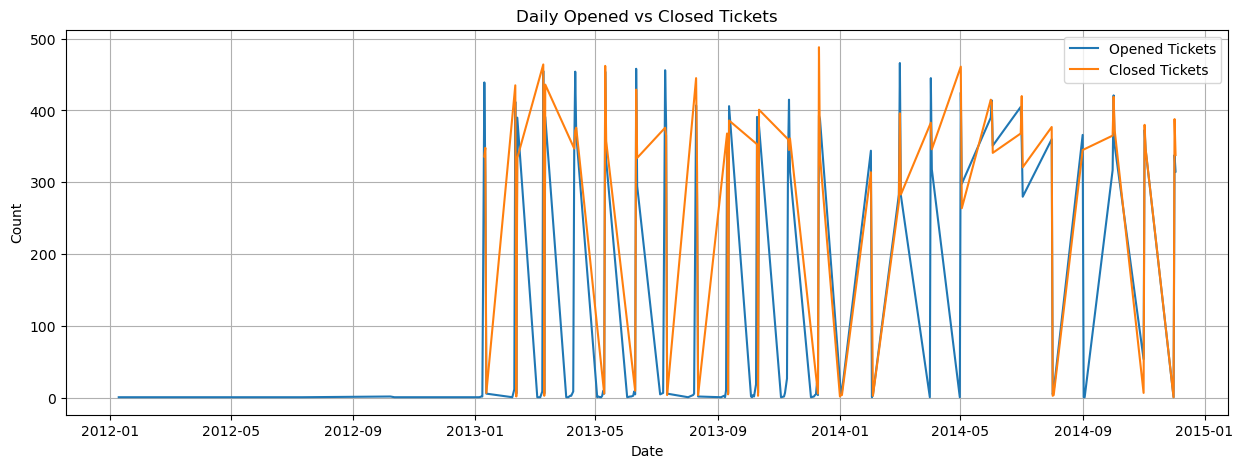

In [30]:
#converting into datetime format

data["Open_Time"] = pd.to_datetime(data["Open_Time"], errors="coerce")
data["Close_Time"] = pd.to_datetime(data["Close_Time"], errors="coerce")

#seperating date

data['Open_Date'] = data['Open_Time'].dt.date
data['Close_Date'] = data['Close_Time'].dt.date

#Count by date

Open_date = data.groupby('Open_Date').size()
Close_date = data.groupby('Close_Date').size()

#plotting the figure

plt.figure(figsize=(15, 5))
Open_date.plot(label='Opened Tickets')
Close_date.plot(label='Closed Tickets')
plt.title('Daily Opened vs Closed Tickets')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
#dropping the unwanted column created during the time based analysis

data.drop(columns=['Open_monthwise', 'Open_yearwise', 'Open_datewise', 'Open_Date', 'Close_Date'], inplace=True)

In [32]:
#Checking the columns after dropping

data.columns

Index(['Unnamed: 0', 'CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID',
       'Status', 'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category',
       'KB_number', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

### **CLEANING THE DATA**

#### **1) Handling missing values**

In [33]:
#Filling the categorical columns with the 'unknown' or 'other'
data['CI_Cat'].fillna("unknown", inplace=True)
data['CI_Subcat'].fillna('unknown', inplace=True)
data['Closure_Code'].fillna('other', inplace=True)

#Filling the numerical columns with the value 0
numerical_cols=['No_of_Related_Interactions', 'No_of_Related_Incidents', 'No_of_Related_Changes', 'No_of_Reassignments']
for i in numerical_cols:
    data[i].fillna(0, inplace=True)

#Filling the priority column with the mode
data["Priority"].fillna(data['Priority'].mode()[0], inplace=True)

#Filling the Handle_Time_hrs with the median
data['Handle_Time_hrs']=data['Handle_Time_hrs'].astype(str).str.replace(',','').astype(float)
data['Handle_Time_hrs'].fillna(data['Handle_Time_hrs'].median(), inplace=True)

#Filling the related change with the no_change
data['Related_Change'].fillna('no_change', inplace=True)

In [34]:
#Converting the Reopened and Resolved time to datetime format and creating flags
data['Reopen_Time']=pd.to_datetime(data['Reopen_Time'], errors='coerce')
data['Resolved_Time']=pd.to_datetime(data['Resolved_Time'], errors='coerce')

#creating binary flags as reopened or not and resolved or not 
data['Was_Reopened']=data['Reopen_Time'].notnull().astype(int)
data['Was_Resolved']=data['Resolved_Time'].notnull().astype(int)

In [35]:
#cleaning the impact column
data["Impact"]=data["Impact"].replace('NS', pd.NA)
data["Impact"]=pd.to_numeric(data["Impact"], errors='coerce')
data["Impact"]=data["Impact"].fillna(data["Impact"].mode()[0])

In [36]:
#Cleaning the Urgency column
data["Urgency"]=data["Urgency"].astype(str).str.strip() #str.strip() function is used to remove the leading spaces
data["Urgency"]=data["Urgency"].replace('5 - Very Low', '5')
data["Urgency"]=data["Urgency"].astype(int)

In [37]:
#Dropping the unwanted column
data.drop(columns='Unnamed: 0', inplace=True)

In [38]:
# Standardize string columns to lowercase
string_cols = ['CI_Name','CI_Cat','CI_Subcat','WBS','Status','Impact','Urgency','Category','KB_number', 'Alert_Status','Closure_Code','Related_Interaction','Related_Change']
for col in string_cols:
   data[col] = data[col].astype(str).str.lower()

In [39]:
#checking the data after cleaning
data.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                     27994
Reopen_Time                   45735
Resolved_Time                 29029
Close_Time                    28273
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents           0
No_of_Related_Changes             0
Related_Change                    0
Was_Reopened                      0
Was_Resolved                      0
dtype: int64

## **TASK:1**

#### **PREDICTING HIGH PRIORITY TICKETS:** 
##### To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

##### **TARGET CREATION**

In [40]:
#Selecting the features for priority prediction

High_Priority_features = ['CI_Cat', 'CI_Subcat', 'Impact', 'Urgency', 'Category', 'Alert_Status']

In [41]:
#Target Creation for the model building of Priority prediction

data["High_Priority"]=data['Priority'].apply(lambda x: 1 if x in [1,2] else 0)

In [61]:
#encoding the categorical columns

from sklearn.preprocessing import LabelEncoder
cat_cols = ['CI_Cat', 'CI_Subcat', 'Impact', 'Urgency','Category', 'Alert_Status']
le=LabelEncoder()
for cols in cat_cols:
    data[cols]=le.fit_transform(data[cols].astype(str))

In [62]:
data[High_Priority_features]

,CI_Cat,CI_Subcat,Impact,Urgency,Category,Alert_Status
0,3,53,3,3,1,0
1,0,53,2,2,1,0
2,0,2,3,2,3,0
3,0,53,3,3,1,0
4,0,53,3,3,1,0
...,...,...,...,...,...,...
46601,0,39,3,3,1,0
46602,0,39,3,3,1,0
46603,5,13,4,4,1,0
46604,0,53,3,3,1,0


In [63]:
#splitting the data as x and y
X=data[High_Priority_features]
y=data["High_Priority"]

In [64]:
#Splitting the data as train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
#checking the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34954, 6)
(11652, 6)
(34954,)
(11652,)


In [66]:
#checking the target column
data["High_Priority"].value_counts()

High_Priority
0    45906
1      700
Name: count, dtype: int64

In [67]:
#Target Column is highly imbalanced, we need to perform SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled=sm.fit_resample(X_train,y_train)

In [68]:
y_resampled.value_counts()

High_Priority
0    34425
1    34425
Name: count, dtype: int64

#### **MODEL BUILDING**

##### **1) RANDOMFORESTCLASSIFIER**

In [69]:
#RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
rf_p=RandomForestClassifier(random_state=42)
rf_p.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [70]:
rf_p_y_predict=rf_p.predict(X_test)
print("Accuracy_score:", accuracy_score(y_test, rf_p_y_predict))
print("f1_score:", f1_score(y_test, rf_p_y_predict))
print("Confusion Matrix \n", confusion_matrix(y_test, rf_p_y_predict))
print("Classification Report \n", classification_report(y_test, rf_p_y_predict))

#checking feature importance
rf_p_importances = rf_p.feature_importances_
rf_p_features=X_resampled.columns
rf_p_featimp_df = pd.DataFrame({"Features":rf_p_features, "Importance":rf_p_importances})
rf_p_featimp_df.sort_values(by='Importance', ascending=False, inplace=True)
print("FEATURE IMPORTANCE")
print(rf_p_featimp_df)

Accuracy_score: 0.9997425334706488
f1_score: 0.991304347826087
Confusion Matrix 
 [[11478     3]
 [    0   171]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11481
           1       0.98      1.00      0.99       171

    accuracy                           1.00     11652
   macro avg       0.99      1.00      1.00     11652
weighted avg       1.00      1.00      1.00     11652

FEATURE IMPORTANCE
       Features  Importance
3       Urgency    0.497090
2        Impact    0.356652
0        CI_Cat    0.100321
1     CI_Subcat    0.035222
4      Category    0.010714
5  Alert_Status    0.000000


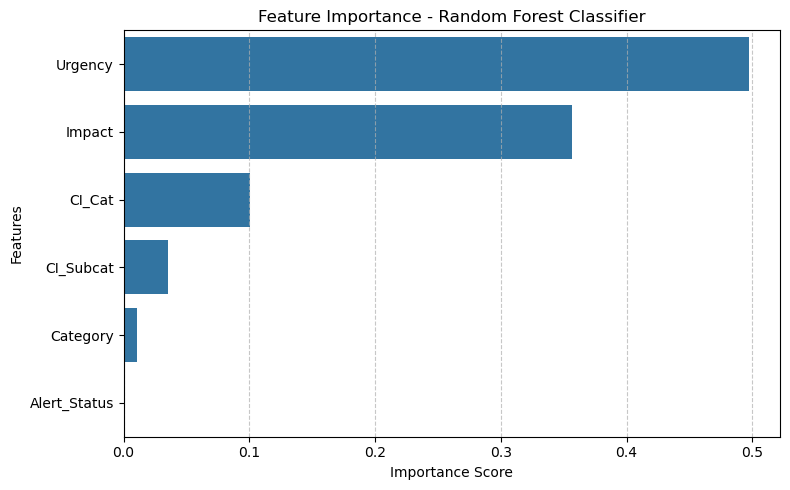

In [71]:
#Visualization of feature importance of randomforestclassifier
plt.figure(figsize=(8,5))
sns.barplot(data=rf_p_featimp_df, x='Importance', y='Features')
plt.title('Feature Importance - Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### **2) DECISIONTREECLASSIFIER**

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_p=DecisionTreeClassifier(random_state=42)
dt_p.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

In [73]:
dt_p_y_predict=dt_p.predict(X_test)
print("Accuracy_score:", accuracy_score(y_test, dt_p_y_predict))
print("f1_score:", f1_score(y_test, dt_p_y_predict))
print("Confusion Matrix \n", confusion_matrix(y_test, dt_p_y_predict))
print("Classification Report \n", classification_report(y_test, dt_p_y_predict))

#feature importance
dt_p_importance = dt_p.feature_importances_
dt_p_features = X_resampled.columns
dt_p_featimp_df = pd.DataFrame({"Features":dt_p_features, "Importance":dt_p_importance})
dt_p_featimp_df.sort_values(by="Importance", ascending=False, inplace=True)
print("FEATURE IMPORTANCE OF DECISION TREE CLASSIFIER")
print(dt_p_featimp_df)

Accuracy_score: 1.0
f1_score: 1.0
Confusion Matrix 
 [[11481     0]
 [    0   171]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11481
           1       1.00      1.00      1.00       171

    accuracy                           1.00     11652
   macro avg       1.00      1.00      1.00     11652
weighted avg       1.00      1.00      1.00     11652

FEATURE IMPORTANCE OF DECISION TREE CLASSIFIER
       Features  Importance
2        Impact    0.999869
3       Urgency    0.000131
0        CI_Cat    0.000000
1     CI_Subcat    0.000000
4      Category    0.000000
5  Alert_Status    0.000000


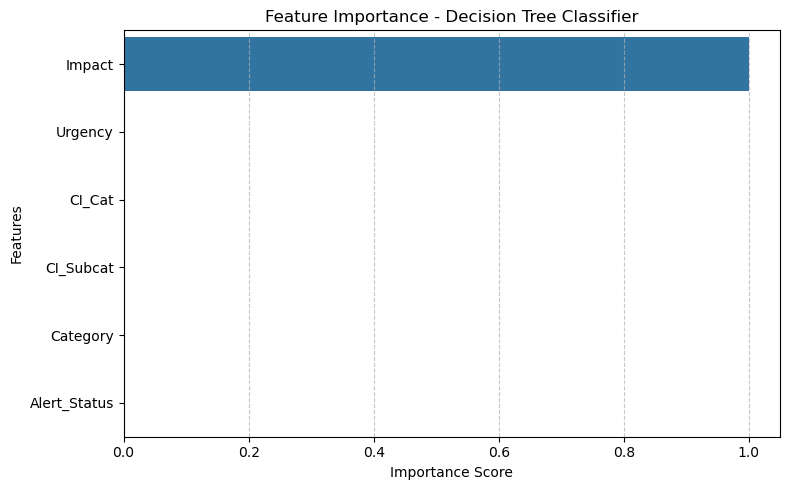

In [74]:
#Visualization of feature importance of decisiontreeclassifier
plt.figure(figsize=(8,5))
sns.barplot(data=dt_p_featimp_df, x='Importance', y='Features')
plt.title('Feature Importance - Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### **3) XGBCLASSIFIER**

In [75]:
from xgboost import XGBClassifier
from xgboost import plot_importance
xgb_p=XGBClassifier(random_state=42)
xgb_p.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy_score: 1.0
f1_score: 1.0
Confusion Matrix [[11481     0]
 [    0   171]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11481
           1       1.00      1.00      1.00       171

    accuracy                           1.00     11652
   macro avg       1.00      1.00      1.00     11652
weighted avg       1.00      1.00      1.00     11652



<Figure size 1000x800 with 0 Axes>

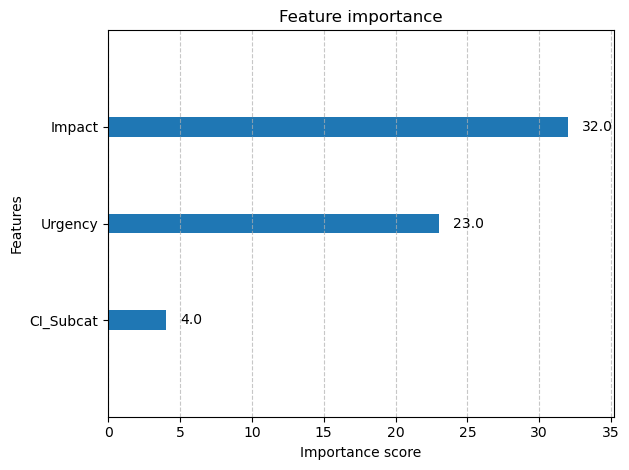

In [76]:
#prediction
xgb_p_y_predict = xgb_p.predict(X_test)

#Evaluation of metrics
print("Accuracy_score:", accuracy_score(y_test, xgb_p_y_predict))
print("f1_score:", f1_score(y_test, xgb_p_y_predict))
print("Confusion Matrix", confusion_matrix(y_test, xgb_p_y_predict))
print("Classification Report", classification_report(y_test, xgb_p_y_predict))

#Visualization of feature importance of XGBClassifier
plt.figure(figsize=(10,8))
plot_importance(xgb_p, grid=False)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### **4) SUPPORTVECTORCLASSIFIER**

In [77]:
#Importing the package
from sklearn.svm import SVC

#initializing the model
svc_p = SVC(kernel='linear',random_state=42)

#fitting the data
svc_p.fit(X_resampled, y_resampled)

SVC(kernel='linear', random_state=42)

In [78]:
#prediction
svc_p_y_predict = svc_p.predict(X_test)

#Evaluation of metrics

print("Accuracy_score", accuracy_score(y_test, svc_p_y_predict))
print("f1_score", f1_score(y_test, svc_p_y_predict))
print("Confusion Matrix", confusion_matrix(y_test, svc_p_y_predict))
print("Classification Report", classification_report(y_test, svc_p_y_predict))

Accuracy_score 1.0
f1_score 1.0
Confusion Matrix [[11481     0]
 [    0   171]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11481
           1       1.00      1.00      1.00       171

    accuracy                           1.00     11652
   macro avg       1.00      1.00      1.00     11652
weighted avg       1.00      1.00      1.00     11652



#### **EVALUATION OF METRICS FOR TASK 1**

In [79]:
#Storing the results in the dataframe
rf_p_f1_score=f1_score(y_test, rf_p_y_predict)
dt_p_f1_score=f1_score(y_test, dt_p_y_predict)
xgb_p_f1_score=f1_score(y_test, xgb_p_y_predict)
svc_p_f1_score=f1_score(y_test, svc_p_y_predict)

algorithms = ["RandomForestClassifier", "DecisionTreeClassifier", "XGBoostClassifier", "SupportVectorClassifier"]
f1_scores = [rf_p_f1_score, dt_p_f1_score, xgb_p_f1_score, svc_p_f1_score]

Highpriority_task_scores_df = pd.DataFrame({"ALGORITHMS":algorithms, "F1_SCORE":f1_scores}, index=[1,2,3,4])
Highpriority_task_scores_df

,ALGORITHMS,F1_SCORE
1,RandomForestClassifier,0.991304
2,DecisionTreeClassifier,1.000000
3,XGBoostClassifier,1.000000
4,SupportVectorClassifier,1.000000


##### **RESULTS:** Based on the accuracy score, we are choosing randomforest classifier for the Task 1

## **TASK: 2**

#### **INCIDENT FORECASTING:** 
##### Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

In [123]:
#preparing the time series data for Model selection
data["Open_date"]=data["Open_Time"].dt.date
incident_volume=data.groupby("Open_date")["Incident_ID"].count()
incident_volume.index=pd.to_datetime(incident_volume.index) 
incident_volume=incident_volume.asfreq('D') #changing the frequency as Daily
incident_volume=incident_volume.fillna(0) #filling the missing values with 0

#splitting the data
train_size = int(len(incident_volume)*0.8)
train, test = incident_volume.iloc[:train_size], incident_volume.iloc[train_size:]
#printing length the train and test
print(len(train))
print(len(test))

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#fitting arima model
arima_model = ARIMA(train, order=(5,1,0))
arima_model_fit = arima_model.fit()

#forecasting the future
arima_forecast = arima_model_fit.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"Incident Volume Forecasting RMSE: {rmse}")

847
212
Incident Volume Forecasting RMSE: 115.84014883828254


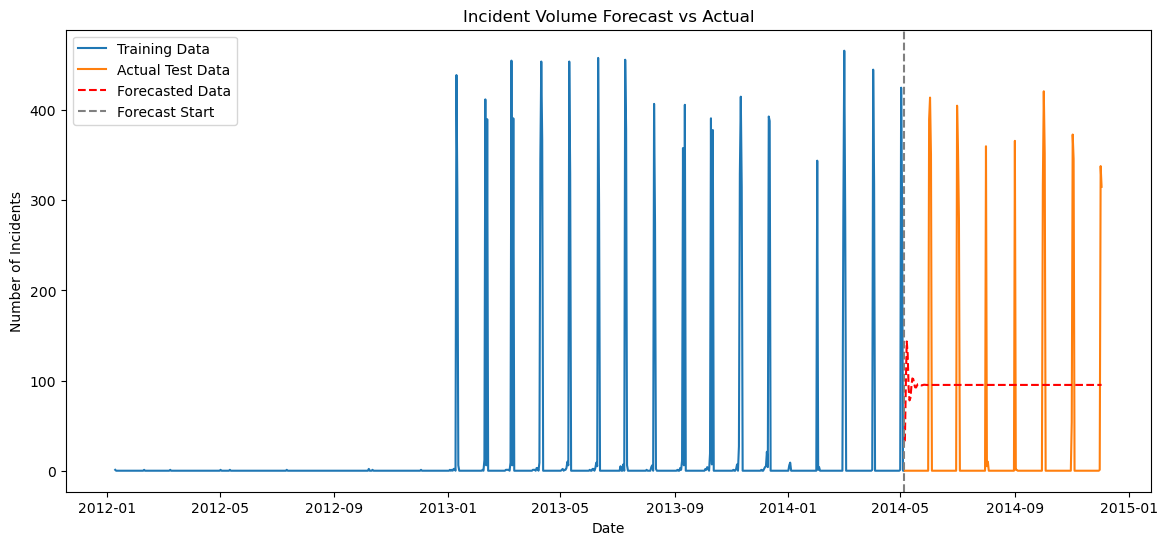

In [124]:
# Plotting
plt.figure(figsize=(14,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, arima_forecast, label='Forecasted Data', linestyle='--', color='red')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('Incident Volume Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()

In [125]:
# Prepare Data for Prophet (needs 'ds' and 'y' columns)
from prophet import Prophet
data['Open_Date'] = data['Open_Time'].dt.date
incident_volume = data.groupby('Open_Date')['Incident_ID'].count().reset_index()
incident_volume.columns = ['ds', 'y']

# Convert date column to datetime
incident_volume['ds'] = pd.to_datetime(incident_volume['ds'])

# Chronological Split
train_size = int(len(incident_volume) * 0.8)
train = incident_volume.iloc[:train_size]
test = incident_volume.iloc[train_size:]

# Fit Prophet Model
prophet_model = Prophet()
prophet_model.fit(train)

# Forecast for Test Period Length
prophet_future = prophet_model.make_future_dataframe(periods=len(test), freq='D')
prophet_forecast = prophet_model.predict(prophet_future)

# Extract Forecasted yhat values for Test period
forecast_test = prophet_forecast.iloc[-len(test):]

# Evaluation on Test Set
rmse = np.sqrt(mean_squared_error(test['y'], forecast_test['yhat']))
print(f"Prophet Incident Volume Forecasting RMSE: {rmse}")


22:58:41 - cmdstanpy - INFO - Chain [1] start processing
22:58:42 - cmdstanpy - INFO - Chain [1] done processing


Prophet Incident Volume Forecasting RMSE: 258.80326694746344


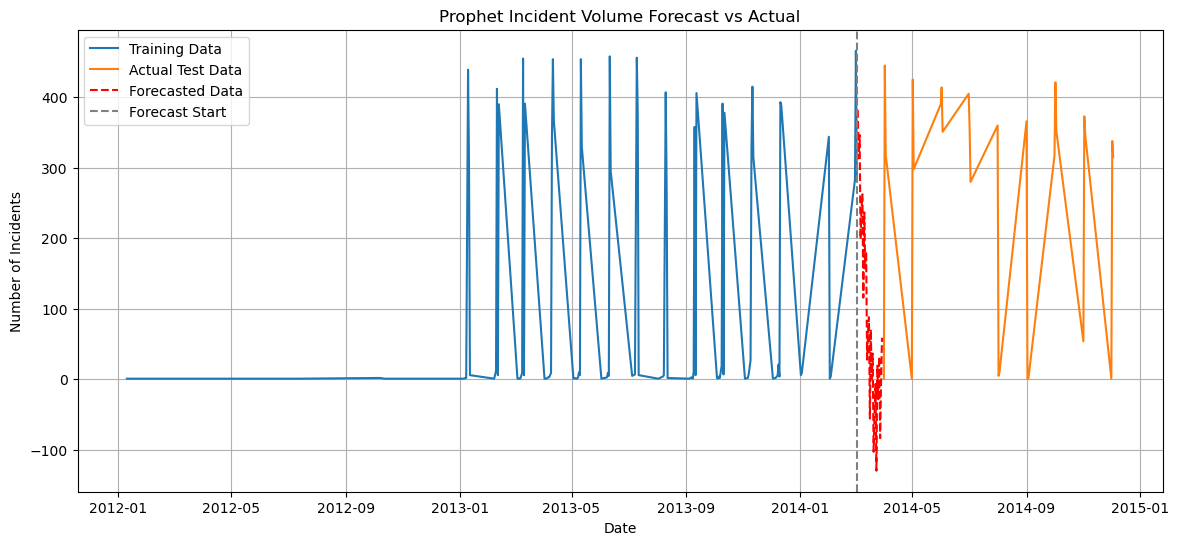

In [126]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Test Data')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Forecasted Data', linestyle='--', color='red')
plt.axvline(x=train['ds'].iloc[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('Prophet Incident Volume Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
#converting the datatype of the opentime column:
data["Open_Time"]=pd.to_datetime(data["Open_Time"], errors='coerce')
#Month Wise
data["Month_Open_Time"]=data["Open_Time"].dt.to_period("M")
#Quarter wise
data["Quarter_Open_Time"]=data["Open_Time"].dt.to_period("Q")

In [82]:
#Counting the number of occurance
monthly_count = data.groupby("Month_Open_Time").size()
quarterly_count = data.groupby("Quarter_Open_Time").size()

In [83]:
#We need to convert the month index to datetime for Timeseries models
monthly_count.index = monthly_count.index.to_timestamp()

In [84]:
#Now we need to sort the data in the chronological order
time_series_data = monthly_count.sort_index()

In [85]:
#fitting the data in ARIMA model
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(time_series_data, order=(1,1,1))
arima_model_fit = arima_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [86]:
#Incident forecasting for Quarter
quarter_forecast = arima_model_fit.forecast(steps=3)
print("Next Three Months Forecast")
print(quarter_forecast)

Next Three Months Forecast
31    689.198142
32    705.452705
33    712.959090
Name: predicted_mean, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


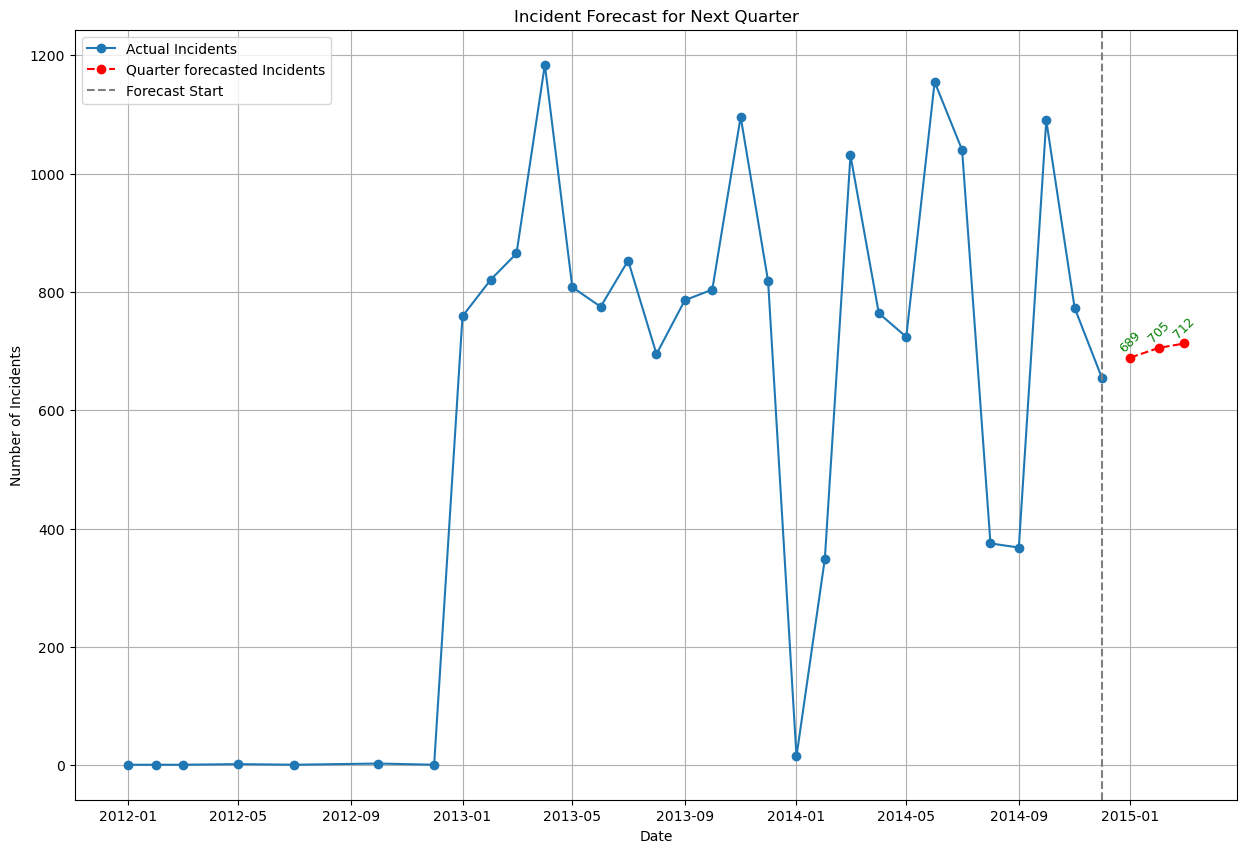

In [87]:
#Visualization of Quarter Forecast

#setting up the index for Quarter Forecast
actual_last_date = time_series_data.index[-1] #getting the last index of actual
#Generating future forcast index for Quarter
quarter_forecast_index = pd.date_range(start=actual_last_date + pd.DateOffset(months=1), periods=3, freq='MS')
# Combine actual and forecast into one series with the index
quarter_forecast_series = pd.Series(quarter_forecast.values, index=quarter_forecast_index)

#Plotting the predicted vs actual
plt.figure(figsize=(15,10))
plt.plot(time_series_data, label='Actual Incidents', marker='o')
plt.plot(quarter_forecast_series, label='Quarter forecasted Incidents', linestyle='--', color='red', marker='o')
plt.axvline(x=time_series_data.index[-1], color='gray', linestyle='--', label='Forecast Start')

# Annotate forecasted points
for date, value in quarter_forecast_series.items():
    plt.text(date, value + 10, f'{int(value)}', ha='center', fontsize=9, color='green', rotation=45)
    
plt.title('Incident Forecast for Next Quarter')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Annual Forecast
31    689.198142
32    705.452705
33    712.959090
34    716.425551
35    718.026369
36    718.765630
37    719.107021
38    719.264677
39    719.337482
40    719.371104
41    719.386631
42    719.393801
Name: predicted_mean, dtype: float64


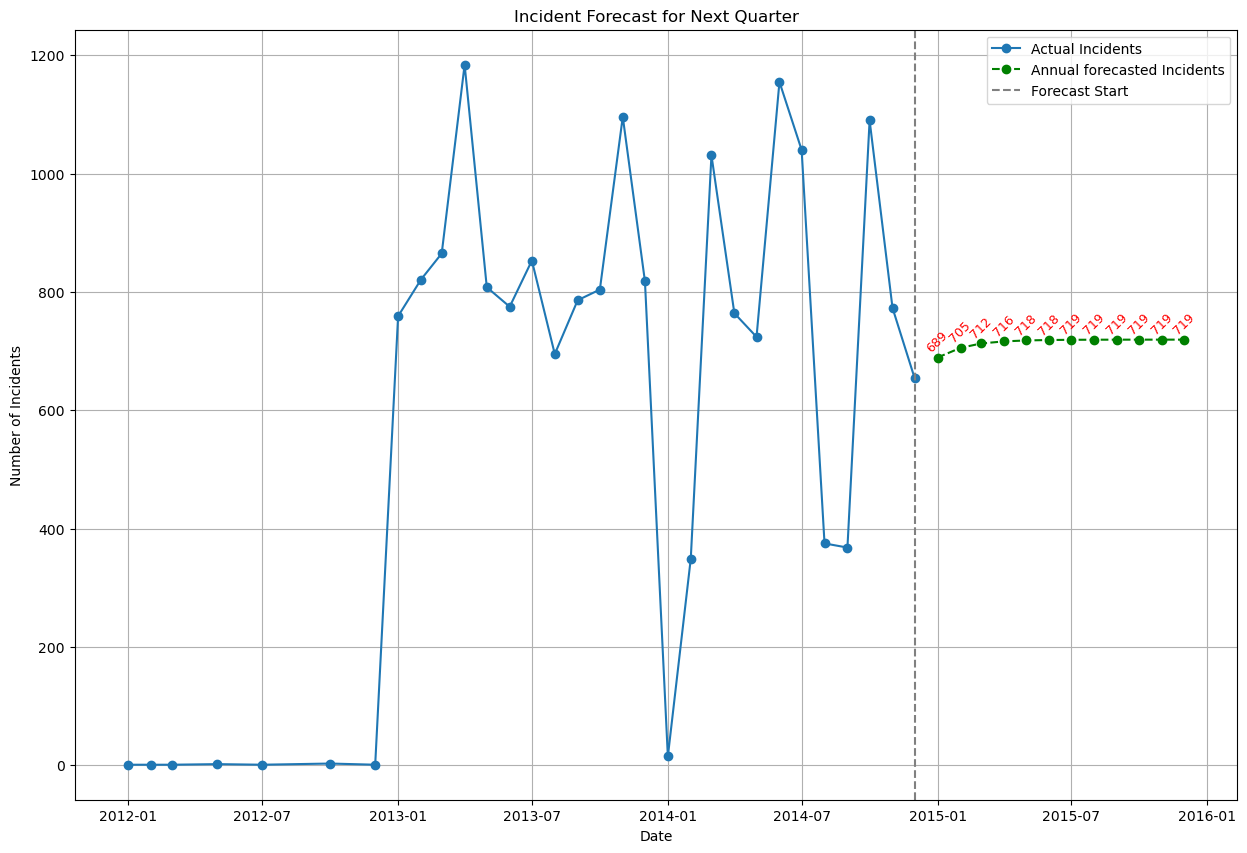

In [88]:
#Visualization of 

annual_forecast = arima_model_fit.forecast(steps=12)
print("Annual Forecast")
print(annual_forecast)

#Generating future forcast index for Annual
annual_forecast_index = pd.date_range(start=actual_last_date + pd.DateOffset(months=1), periods=12, freq='MS')
# Combine actual and forecast into one series with the index
annual_forecast_series = pd.Series(annual_forecast.values, index=annual_forecast_index)

#Plotting the predicted vs actual
plt.figure(figsize=(15,10))
plt.plot(time_series_data, label='Actual Incidents', marker='o')
plt.plot(annual_forecast_series, label="Annual forecasted Incidents", linestyle='--', color='green', marker='o')
plt.axvline(x=time_series_data.index[-1], color='gray', linestyle='--', label='Forecast Start')
# Annotate forecasted points
for date, value in annual_forecast_series.items():
    plt.text(date, value + 10, f'{int(value)}', ha='center', fontsize=9, color='red', rotation=45)
plt.title('Incident Forecast for Next Quarter')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.show()

### **TASK:3**

#### **AUTOTTAGGING TICKETS** 
##### Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

#### **FEATURE SELECTION AND TARGET SELECTION**

In [89]:
#feature selection
autotag_features = ['CI_Cat', 'CI_Subcat', 'Impact', 'Urgency', 'Alert_Status', 'Closure_Code']

In [90]:
#Encoding the features
le=LabelEncoder()
for col in autotag_features:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col].astype(str))


#Seperating the X and Y
X=data[autotag_features]
y_priority=data['Priority']
y_category=data['Category']

# For Priority
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_priority, test_size=0.25, random_state=42)

# For Category
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_category, test_size=0.25, random_state=42)

#Applying Smote
sm = SMOTE(random_state=42, k_neighbors=1)
X_res_p, y_res_p = sm.fit_resample(X_train_p, y_train_p)
X_res_c, y_res_c = sm.fit_resample(X_train_c, y_train_c)

#### **MODEL SELECTION**

#### **1) RANDOMFORESTCLASSIFIER**

In [91]:
#Setting up the Model
rf_priority = RandomForestClassifier(random_state=42)
rf_priority.fit(X_res_p, y_res_p)

# Category Model
rf_category = RandomForestClassifier(random_state=42)
rf_category.fit(X_res_c, y_res_c)

y_pred_p = rf_priority.predict(X_test_p)
print("Priority Prediction Report")
print("Accuracy_score",accuracy_score(y_test_p, y_pred_p))
print(classification_report(y_test_p, y_pred_p))

# Category
y_pred_c = rf_category.predict(X_test_c)
print("Category Prediction Report")
print("Accuracy_score",accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

Priority Prediction Report
Accuracy_score 0.9960521798832819
              precision    recall  f1-score   support

         2.0       0.99      1.00      1.00       171
         3.0       0.99      0.98      0.98      1358
         4.0       1.00      1.00      1.00      6021
         5.0       1.00      1.00      1.00      4102

    accuracy                           1.00     11652
   macro avg       0.99      0.99      0.99     11652
weighted avg       1.00      1.00      1.00     11652

Category Prediction Report
Accuracy_score 0.9060247167868177
              precision    recall  f1-score   support

           0       0.12      1.00      0.21         2
           1       0.98      0.90      0.94      9445
           2       0.00      0.00      0.00         1
           3       0.69      0.92      0.79      2204

    accuracy                           0.91     11652
   macro avg       0.45      0.71      0.48     11652
weighted avg       0.93      0.91      0.91     11652



#### **2) DECISIONTREECLASSIFIER**

In [92]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Setting up the Model
dt_priority = DecisionTreeClassifier(random_state=42)
dt_priority.fit(X_res_p, y_res_p)

# Category Model
dt_category = DecisionTreeClassifier(random_state=42)
dt_category.fit(X_res_c, y_res_c)

y_test_c = y_test_c.astype(int)
y_pred_c = y_pred_c.astype(int)

y_pred_p = dt_priority.predict(X_test_p)
print("Priority Prediction Report")
print("Accuracy_score",accuracy_score(y_test_p, y_pred_p))
print(classification_report(y_test_p, y_pred_p))

# Category
y_pred_c = dt_category.predict(X_test_c)
print("Category Prediction Report")
print("Accuracy_score",accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

Priority Prediction Report
Accuracy_score 0.9959663577068314
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       171
         3.0       0.99      0.98      0.98      1358
         4.0       1.00      1.00      1.00      6021
         5.0       1.00      1.00      1.00      4102

    accuracy                           1.00     11652
   macro avg       1.00      0.99      0.99     11652
weighted avg       1.00      1.00      1.00     11652

Category Prediction Report
Accuracy_score 0.9057672502574665
              precision    recall  f1-score   support

           0       0.12      1.00      0.21         2
           1       0.98      0.90      0.94      9445
           2       0.00      0.00      0.00         1
           3       0.69      0.92      0.79      2204

    accuracy                           0.91     11652
   macro avg       0.45      0.71      0.48     11652
weighted avg       0.93      0.91      0.91     11652



### **TASK:4**

#### **PREDICTION OF RFC:**
##### Predict RFC (Request for change) and possible failure/misconfiguration of ITSM assets.

In [93]:
#Selecting the features
rfc_features=data[['CI_Cat', 'CI_Subcat', 'Impact', 'Urgency', 'Category', 'No_of_Reassignments', 'Alert_Status', 'Closure_Code', 'Was_Reopened']]

#Defining the target column
data['Related_Change_Binary'] = data['Related_Change'].apply(lambda x: 0 if x == 'no_change' else 1)
data['Related_Change_Binary']=data['Related_Change_Binary'].fillna(0).astype(int)

#Defining X and y

X_rfc = rfc_features
y_rfc = data['Related_Change_Binary']

#Train and Test Spliting 

X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_rfc, y_rfc, test_size=0.25, random_state=42) 
print(X_train_rfc.shape)
print(X_test_rfc.shape)
print(y_train_rfc.shape)
print(y_test_rfc.shape)

(34954, 9)
(11652, 9)
(34954,)
(11652,)


In [94]:
y_train_rfc.value_counts()

Related_Change_Binary
0    34523
1      431
Name: count, dtype: int64

In [95]:
#Applying smote to the target column
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res_rfc, y_res_rfc = sm.fit_resample(X_train_rfc, y_train_rfc)
y_res_rfc.value_counts()

Related_Change_Binary
0    34523
1    34523
Name: count, dtype: int64

### **MODEL BUILDING**

#### **1) RANDOM FOREST CLASSIFIER**

In [97]:
#Initializing the model
rfc_rf = RandomForestClassifier(random_state=42)
#Fitting the values
rfc_rf.fit(X_res_rfc, y_res_rfc)
#Prediction
rf_y_pred_rfc = rfc_rf.predict(X_test_rfc)
#Model Evaluation
print("Accuracy:", accuracy_score(y_test_rfc, rf_y_pred_rfc))
print(confusion_matrix(y_test_rfc, rf_y_pred_rfc))
print(classification_report(y_test_rfc, rf_y_pred_rfc))

Accuracy: 0.8341057329213869
[[9654 1869]
 [  64   65]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     11523
           1       0.03      0.50      0.06       129

    accuracy                           0.83     11652
   macro avg       0.51      0.67      0.49     11652
weighted avg       0.98      0.83      0.90     11652



#### **2) DECISION TREE CLASSIFIER**

In [98]:
from sklearn.tree import DecisionTreeClassifier
#Initializing the model
rfc_dt = DecisionTreeClassifier(random_state=42)
#Fitting the values
rfc_dt.fit(X_res_rfc, y_res_rfc)
#Prediction
dt_y_pred_rfc = rfc_dt.predict(X_test_rfc)
#Model Evaluation
print("Accuracy:", accuracy_score(y_test_rfc, dt_y_pred_rfc))
print(confusion_matrix(y_test_rfc, dt_y_pred_rfc))
print(classification_report(y_test_rfc, dt_y_pred_rfc))

Accuracy: 0.8326467559217302
[[9637 1886]
 [  64   65]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     11523
           1       0.03      0.50      0.06       129

    accuracy                           0.83     11652
   macro avg       0.51      0.67      0.49     11652
weighted avg       0.98      0.83      0.90     11652



#### **3)XGBOOST CLASSIFIER**

In [99]:
#XGBoost Classifier
from xgboost import XGBClassifier
#Initializing the model
rfc_xgb = XGBClassifier(random_state=42)
#Fitting the values
rfc_xgb.fit(X_res_rfc, y_res_rfc)
#Prediction
xgb_y_pred_rfc = rfc_xgb.predict(X_test_rfc)
#Model Evaluation
print("Accuracy:", accuracy_score(y_test_rfc, xgb_y_pred_rfc))
print(confusion_matrix(y_test_rfc, xgb_y_pred_rfc))
print(classification_report(y_test_rfc, xgb_y_pred_rfc))

Accuracy: 0.831101956745623
[[9616 1907]
 [  61   68]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.91     11523
           1       0.03      0.53      0.06       129

    accuracy                           0.83     11652
   macro avg       0.51      0.68      0.49     11652
weighted avg       0.98      0.83      0.90     11652



### **MODEL OPTIMIZATION**

#### **1)RANDOMFORESTCLASSIFIER**

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

rf_rfc = RandomForestClassifier(random_state=42)

rf_rfc_grid = GridSearchCV(estimator=rf_rfc, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

rf_rfc_grid.fit(X_res_rfc, y_res_rfc)

# Best params & score
print("Best Parameters:", rf_rfc_grid.best_params_)
print("Best Accuracy:", rf_rfc_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8874229743124742


In [111]:
rf_rfc = RandomForestClassifier(class_weight='balanced',
                                 max_depth=20, min_samples_split=2, 
                                 n_estimators= 300, random_state=42)
rf_rfc.fit(X_res_rfc, y_res_rfc)

rf_rfc_y_pred = rf_rfc.predict(X_test_rfc)

rf_rfc_accuracy_score=accuracy_score(y_test_rfc, rf_rfc_y_pred)
print(rf_rfc_accuracy_score)

0.8318743563336766


#### **2) DECISION TREE CLASSIFIER**

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

dt_rfc = DecisionTreeClassifier(random_state=42)

dt_rfc_grid = GridSearchCV(estimator=dt_rfc, param_grid=param_grid_dt, 
                           cv=5, scoring='accuracy', n_jobs=1, verbose=2)

dt_rfc_grid.fit(X_res_rfc, y_res_rfc)


# Best params & score
print("Best Parameters:", dt_rfc_grid.best_params_)
print("Best Accuracy:", dt_rfc_grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=10; total time=   0.0s
[CV

In [110]:
dt_rfc = DecisionTreeClassifier(class_weight='balanced', max_depth=None, min_samples_split=2)
dt_rfc.fit(X_res_rfc, y_res_rfc)

dt_rfc_y_pred = dt_rfc.predict(X_test_rfc)

dt_rfc_accuracy_score=accuracy_score(y_test_rfc, dt_rfc_y_pred)

print(dt_rfc_accuracy_score)

0.8328184002746309


In [104]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

xgb_rfc = XGBClassifier(random_state=42)

xgb_rfc_grid = GridSearchCV(estimator=xgb_rfc, param_grid=param_grid_xgb, 
                           cv=5, scoring='accuracy', n_jobs=1, verbose=2)

xgb_rfc_grid.fit(X_res_rfc, y_res_rfc)


# Best params & score
print("Best Parameters:", xgb_rfc_grid.best_params_)
print("Best Accuracy:", xgb_rfc_grid.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1

In [109]:
xgb_rfc = XGBClassifier(learning_rate= 0.2, max_depth= 10, n_estimators= 200, subsample= 0.8)
xgb_rfc.fit(X_res_rfc, y_res_rfc)
xgb_rfc_y_pred = dt_rfc.predict(X_test_rfc)
xgb_rfc_accuracy_score=accuracy_score(y_test_rfc, xgb_rfc_y_pred)
print(xgb_rfc_accuracy_score)

0.8329042224510813


In [115]:
rfc_algorithm = ['Random Forest Classifier', 'Decision Tree Classifier', 'XGBoostClassifier']
rfc_results = [rf_rfc_accuracy_score, dt_rfc_accuracy_score, xgb_rfc_accuracy_score]

rfc_results = pd.DataFrame({"ALGORITHMS":rfc_algorithm, "ACCURACY_SCORE":rfc_results}, index=[1,2,3])

In [116]:
rfc_results

,ALGORITHMS,ACCURACY_SCORE
1,Random Forest Classifier,0.831874
2,Decision Tree Classifier,0.832818
3,XGBoostClassifier,0.832904


<Figure size 1500x1000 with 0 Axes>

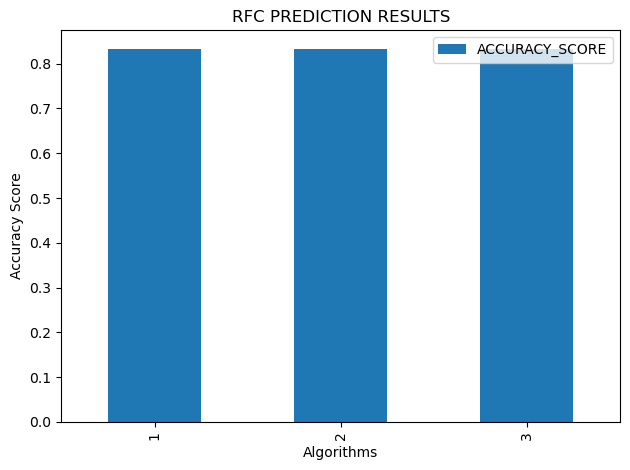

In [119]:
plt.figure(figsize=(15,10))
rfc_results.plot(kind='bar')
plt.title("RFC PREDICTION RESULTS")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

### **RESULTS**

##### **TASK:1**
Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

##### **RESULTS:**
Based on the Evaluating with the Model performance with the good feature importance we got the best accuracy score of 0.99 for **RandomforestClassifier**, So RandomForestClassifier is best suitable for task 1

#### **TASK:2**
Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

#### **RESULTS**
We used two time forecasting models, 'ARIMA' and 'PROPHET' among the two ARIMA performed well and we used the ARIMA model to forecast the next Quarter and Annual counts

NEXT QUARTER FORECAST
1) 689.198142
2) 705.452705
3) 712.959090

NEXT ANNUAL FORECASt
1) 689.198142
2) 705.452705
3) 712.959090
4) 716.425551
5) 718.026369
6) 718.765630
7) 719.107021
8) 719.264677
9) 719.337482
10) 719.371104
11) 719.386631
12) 719.393801

#### **TASK:3**

Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

#### **RESULTS**

Based on the Evaluating with the Model performance with the good feature importance we got the best accuracy score for **DECISIONTREECLASSIFIER**, So DecisionTreeClassifier is best suitable for task 3

#### **TASK:4**

Predict RFC (Request for change) and possible failure/misconfiguration of ITSM assets.

#### **RESULTS**

After hypertuning the models performance with the best parameters **XGBOOSTCLASSIFIER** works best for this task with the accuracy of 0.832904